<a href="https://colab.research.google.com/github/srijayjk/Machine_learning/blob/main/BreastCancer_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
cell_df = pd.read_csv('cell_samples.csv')
print(cell_df.count())
cell_df['Class'].value_counts()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64


2    458
4    241
Name: Class, dtype: int64

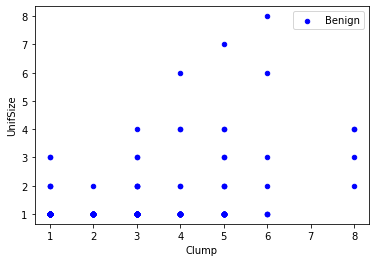

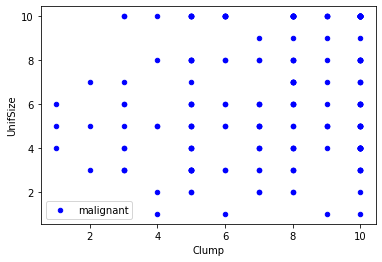

In [46]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind = 'scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind = 'scatter', x='Clump', y='UnifSize', color='blue', label='malignant')

In [47]:

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [49]:
X = cell_df.iloc[:, 1:-1]
y = cell_df['Class']
print(X)
print(y)

     Clump  UnifSize  UnifShape  MargAdh  ...  BareNuc  BlandChrom  NormNucl  Mit
0        5         1          1        1  ...        1           3         1    1
1        5         4          4        5  ...       10           3         2    1
2        3         1          1        1  ...        2           3         1    1
3        6         8          8        1  ...        4           3         7    1
4        4         1          1        3  ...        1           3         1    1
..     ...       ...        ...      ...  ...      ...         ...       ...  ...
694      3         1          1        1  ...        2           1         1    1
695      2         1          1        1  ...        1           1         1    1
696      5        10         10        3  ...        3           8        10    2
697      4         8          6        4  ...        4          10         6    1
698      4         8          8        5  ...        5          10         4    1

[683 rows x 9 c

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape
X_test.shape

(137, 9)

# From Scratch **SVM** 

In [59]:
class SVM:

  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b =None

  def fit(self, X, y):
    y_ = np.where(y <= 0, -1, 1)
    n_samples, n_features = X.shape

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.lr * (2 * self.lambda_param * self.w)
        else:
          
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]

  def predict(self, X):
    linear_output = np.dot(X, self.w) - self.b
    return np.sign(linear_output)

In [ ]:
SVM_class = SVM()
SVM_class.fit(X_train, y_train)

# Using Sklearn

In [57]:
from sklearn import svm

Classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
Classifier.fit(X_train, y_train)
y_predict = Classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

